# `Recognizing Digits with CNN`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Importing the Dataset

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


## 2) Data Preprocessing

### Splitting images and labels

In [5]:
train_images, train_labels = df.drop("label", axis=1), df["label"]

In [6]:
train_images.shape, train_labels.shape

((42000, 784), (42000,))

### No. of Classes

In [7]:
print(f"No. of Classes: {train_labels.nunique()}")

No. of Classes: 10


### Convert to np array and reshape

In [8]:
train_images = np.array(train_images, dtype="float32").reshape((42000, 28, 28, 1))
train_labels = np.array(train_labels, dtype="int32")

### Dummy Variables

In [9]:
train_labels = pd.get_dummies(train_labels)
train_labels

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


### Splitting into Test and Val Set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.1, # Maximize the training data
                                                  random_state=42)

In [11]:
X_train.shape, X_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1))

In [12]:
y_train.shape, y_val.shape

((37800, 10), (4200, 10))

### Some Image Examples

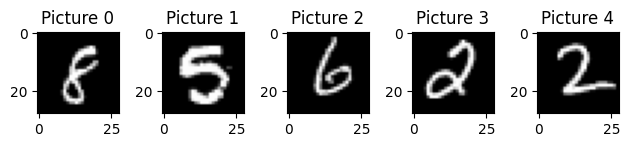

In [13]:
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Picture {i}")
    plt.tight_layout()

plt.show()

## 3) Building the CNN

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# softmax activation for Classification
model.add(Dense(10, activation='softmax'))

### Compiling the CNN

In [15]:
model.compile(optimizer="adam",
              metrics=["accuracy"],
              loss="categorical_crossentropy")

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 576)               0

### Training the CNN

In [17]:
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=25)

Epoch 1/25
1182/1182 [==============================] - 13s 6ms/step - loss: 0.4771 - accuracy: 0.8838 - val_loss: 0.0943 - val_accuracy: 0.9710
Epoch 2/25
1182/1182 [==============================] - 7s 6ms/step - loss: 0.1226 - accuracy: 0.9641 - val_loss: 0.0718 - val_accuracy: 0.9788
Epoch 3/25
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0877 - accuracy: 0.9741 - val_loss: 0.0709 - val_accuracy: 0.9798
Epoch 4/25
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0756 - accuracy: 0.9782 - val_loss: 0.0633 - val_accuracy: 0.9810
Epoch 5/25
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0681 - accuracy: 0.9801 - val_loss: 0.0462 - val_accuracy: 0.9874
Epoch 6/25
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0623 - accuracy: 0.9824 - val_loss: 0.0547 - val_accuracy: 0.9848
Epoch 7/25
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0544 - accuracy: 0.9841 - val_loss: 0.0454 - val_accuracy

## 4) Evaluating the CNN

In [18]:
scores = model.evaluate(X_val, y_val)

132/132 [==============================] - 0s 3ms/step - loss: 0.1061 - accuracy: 0.9833


In [19]:
print("%s: %.6f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.333335%


## 4) Making Predictions on Test